<a href="https://colab.research.google.com/github/ASMAAHASSANNN/unsupervised-predict-streamlit-template/blob/master/JL3_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ea-movie-recommendation-predict-2023-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F64431%2F7061481%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240202%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240202T011706Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D80378647061ec99bb49874cebe1d39092feefbcfea2c6d37675eace560379c468c5b73b2b92e8448861937eee71879e61efe87dc3ea1bae9fd8e575094748f30b1e8f10d5c08843c565edda1487e611bf07c366813e2d56f4a659c54fe7a312357d55e1a4a75ed5a8fbca18dece6d878c9d8a951bd04ae7ce886eaff73f573256d2c0a758bce62dcde2ce2c499ed8df6567433a8d21b7ee9887b9266cc5d438cdf82c96b3bc96d485ea1fb56f784d5df37383e6bca1f10fe984f6a42f85970f67bfedc4dba0c4786782a1fe1fbf99a8ce04bdd6b3a6f60447a04ef5cd967cf2023619c66f306655f73ea3c5843b8b1f67d11657cce16a5e0bcbcc4eafa6e29c5,ea-movies:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4322895%2F7428762%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240202%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240202T011706Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc0df8da8324b5e8714c9a7031768a7dbb4a7e7bc7fb89fb82e80c213fcbdff9212b29919d951ffc83e24fb1c32f5882354c5906cca828ec6a1f0ad24d319b7103dd2efaea86dbd36a4ac3fefc3026d1ae4efc3e3d22493fcbefb661a3bfb45987223eb8b2278b6bdb3bbd4ae1171643a0d05259b5f78675566e99ef963adfd92120f8b57c70089b2121d3f20c99698a4b6f7f034c958db3129be0da444b4e00d93fa15fb32678cac9e86b9b1f9c860ff84168c55922308226fb45aef42f20fce3b61076acc19248d2a60489c7749947f5a29eca410d466c0cce044bc70c16d34029c032084b4fa012113fc0a48a368768501f0989c84b2dc58df5f5d68bffcda'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


  #                  JL3 UNSUPERVISED LEARNING PREDICT

In [1]:

from IPython.display import Image, display

display(Image(url="https://github.com/Explore-AI/Pictures/blob/master/sql_tmdb.jpg?raw=true", width=700))



## Description
this notebook explore the functions and processes of building a recommender system for movies as the task was administered



# List of All Files in Directory

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:

        print(os.path.join(dirname, filename))

/kaggle/input/ea-movies/sample_submission.csv
/kaggle/input/ea-movies/movies.csv
/kaggle/input/ea-movies/imdb_data.csv
/kaggle/input/ea-movies/genome_tags.csv
/kaggle/input/ea-movies/genome_scores.csv
/kaggle/input/ea-movies/train.csv
/kaggle/input/ea-movies/test.csv
/kaggle/input/ea-movies/tags.csv
/kaggle/input/ea-movies/links.csv


# Installing Packages

In [ ]:
!pip --version



pip 23.3.2 from /opt/conda/lib/python3.10/site-packages/pip (python 3.10)


In [ ]:
!pip install --upgrade pip



In [ ]:
# Install packages here
# !pip install --upgrade pip

# !pip install comet_ml

# Packages for data processing
import numpy as np
import pandas as pd
import gc


import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp



# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
sns.set_theme()

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import KNNBaseline
from surprise import NormalPredictor
from surprise import BaselineOnly
from sklearn.metrics.pairwise import linear_kernel
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")



# Packages for saving models
import pickle

In [ ]:
# Install packages here
# !pip install --upgrade pip
# !pip install comet_ml

# Packages for data processing
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import scipy as sp
import re
import gc

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
sns.set_theme()

# Packages for modeling

from sklearn.model_selection import train_test_split

from surprise import SVD, SVDpp, NMF, SlopeOne, CoClustering, KNNBaseline, NormalPredictor, BaselineOnly
from sklearn.metrics.pairwise import linear_kernel
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle


## Reading In data and Overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

# Loading data

In [ ]:
df_sample_submission = pd.read_csv('/kaggle/input/ea-movies/sample_submission.csv')
df_movies = pd.read_csv('/kaggle/input/ea-movies/movies.csv')
df_imdb_data = pd.read_csv('/kaggle/input/ea-movies/imdb_data.csv')
df_genome_scores = pd.read_csv('/kaggle/input/ea-movies/genome_scores.csv')
df_genome_tags = pd.read_csv('/kaggle/input/ea-movies/genome_tags.csv')
df_train = pd.read_csv('/kaggle/input/ea-movies/train.csv')
df_test = pd.read_csv('/kaggle/input/ea-movies/test.csv')
df_tags = pd.read_csv('/kaggle/input/ea-movies/tags.csv')
df_links = pd.read_csv('/kaggle/input/ea-movies/links.csv')


## Data Cleaning

In [ ]:
import pandas as pd

# Assuming you have loaded or created df_train
# Replace '/kaggle/input/ea-movies/train.csv' with the actual file path
df_train = pd.read_csv('/kaggle/input/ea-movies/train.csv')

# Display the head of df_train
df_train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The train dataframe has 4 columns:
* userId - Id assigned to each user in our dataset
* movieId - Id assigned to each movie title
* rating - rating assigned to a specific movie by a specific user.
 * ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
* timestamp - represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [ ]:
print('df_train has '+str(len(df_train))+' observations')

df_train has 10000038 observations


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Assuming 'train' is your DataFrame, replace it with your actual DataFrame variable

# Display the first few rows of the DataFrame before performing data quality checks
print("Initial DataFrame:")
print(df_train.head())

# Check for Missing Values in Each Column
missing_values = df_train.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Check for Duplicates in the Entire DataFrame
duplicate_rows = df_train[df_train.duplicated()]
print("\nDuplicate Rows in the Entire DataFrame:")
print(duplicate_rows)

# Check for Outliers in Numerical Columns (using Z-score)
z_scores = np.abs(zscore(df_train.select_dtypes(include=['number'])))
outliers = (z_scores > 3).all(axis=1)
outliers_df = df_train[outliers]
print("\nRows with Outliers:")
print(outliers_df)

# Check for Consistency in Categorical Columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df_train[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_values)

# Check for Consistency in Numerical Columns
numerical_columns = df_train.select_dtypes(include=['number']).columns
for col in numerical_columns:
    unique_values = df_train[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_values)

# Check for Zero Values in Numerical Columns
zero_values = (df_train[numerical_columns] == 0).sum()
print("\nZero Values in Numerical Columns:")
print(zero_values)


Initial DataFrame:
   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

Missing Values in Each Column:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Duplicate Rows in the Entire DataFrame:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Rows with Outliers:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Unique values in userId:
[  5163 106343 146790 ...  79096  14908 102344]

Unique values in movieId:
[ 57669      5   5459 ... 206347 196867  97148]

Unique values in rating:
[4.  4.5 5.  2.  3.  1.  3.5 2.5 0.5 1.5]

Unique values in timestamp:
[1518349992 1206238739 1076215539 ... 1521235092 1227674807 1479921530]

Zero Values in Numerical Columns:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
import pandas as pd

# Creating the initial DataFrame
data = pd.read_csv("/kaggle/input/ea-movies/train.csv")

df = pd.DataFrame(data)

# Display the initial DataFrame
print("Initial DataFrame:")
print(df)

# Missing Values in Each Column
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Duplicate Rows in the Entire DataFrame
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows in the Entire DataFrame:")
print(duplicate_rows)



# Unique values in userId, movieId, rating, timestamp
unique_values_userId = df['userId'].unique()
unique_values_movieId = df['movieId'].unique()
unique_values_rating = df['rating'].unique()
unique_values_timestamp = df['timestamp'].unique()

print("\nUnique values in userId:")
print(unique_values_userId)

print("\nUnique values in movieId:")
print(unique_values_movieId)

print("\nUnique values in rating:")
print(unique_values_rating)

print("\nUnique values in timestamp:")
print(unique_values_timestamp)

# Zero Values in Numerical Columns
zero_values = (df == 0).sum()
print("\nZero Values in Numerical Columns:")
print(zero_values)


Initial DataFrame:
          userId  movieId  rating   timestamp
0           5163    57669     4.0  1518349992
1         106343        5     4.5  1206238739
2         146790     5459     5.0  1076215539
3         106362    32296     2.0  1423042565
4           9041      366     3.0   833375837
...          ...      ...     ...         ...
10000033  136395    99114     5.0  1521235092
10000034  140078      553     3.0  1002580977
10000035  154807    56782     4.0  1227674807
10000036   85805      327     4.0  1479921530
10000037  139457     1009     4.0   858984862

[10000038 rows x 4 columns]

Missing Values in Each Column:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Duplicate Rows in the Entire DataFrame:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Unique values in userId:
[  5163 106343 146790 ...  79096  14908 102344]

Unique values in movieId:
[ 57669      5   5459 ... 206347 196867  97148]

Unique values in rating:
[4.  4.

## Movie Data

In [ ]:
import from pandas as pd
df_movies.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


This movies dataframe has 3 columns namely:
* movieId
* title of the movie
* genres

In [ ]:
#getting dimensions
print("df_movies "+ str(len(df_movies))+" observations.")

df_movies 62423 observations.


In [ ]:
import pandas as pd

# Given data file path
file_path = '/kaggle/input/ea-movies/movies.csv'

# Step 0: Read data from CSV file
df = pd.read_csv(file_path)

# Step 1: Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

# Step 2: Handle Missing Values (if any)
# No missing values in this case

# Step 3: Correct Data Types
df['movieId'] = pd.to_numeric(df['movieId'], errors='coerce')

# Step 4: Remove Duplicates
df.drop_duplicates(inplace=True)
df['title'] = df['title'].str[:-7]
# Extract the release year from the 'title' column and create a new 'release_year' column

# Step 5: Standardize Text Data
df['title'] = df['title'].str.strip()


# Step 6: Handle "no genres listed"
df['genres'] = df['genres'].replace('(no genres listed)', 'Unknown')

# Display the cleaned data
print("\nCleaned Data:")
print(df)


Missing Values:
movieId    0
title      0
genres     0
dtype: int64

Cleaned Data:
       movieId                        title  \
0            1                    Toy Story   
1            2                      Jumanji   
2            3             Grumpier Old Men   
3            4            Waiting to Exhale   
4            5  Father of the Bride Part II   
...        ...                          ...   
62418   209157                           We   
62419   209159           Window of the Soul   
62420   209163                    Bad Poems   
62421   209169                 A Girl Thing   
62422   209171      Women of Devil's Island   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                               

In [ ]:
import pandas as pd
df_movies=pd.read_csv("/kaggle/input/ea-movies/movies.csv")
# Assuming 'imdb' is your DataFrame, replace it with your actual DataFrame variable

# Display the number of missing values in each column before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_movies.isnull().sum())

# Drop rows with missing values
df_movies_cleaned = df_movies.dropna()

# Display the number of missing values in each column after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_movies_cleaned.isnull().sum())


Missing Values in Each Column (Before Cleaning):
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Each Column (After Cleaning):
movieId    0
title      0
genres     0
dtype: int64


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the punkt tokenizer (if not already downloaded)
nltk.download('punkt')


movie_titles =data = pd.read_csv("/kaggle/input/ea-movies/movies.csv")
movie_titles = pd.DataFrame(data)


# Tokenize each movie title
tokenized_titles = [word_tokenize(title) for title in movie_titles]

# Display the tokenized titles
for title, tokens in zip(movie_titles, tokenized_titles):
    print(f"Title: {title}")
    print(f"Tokens: {tokens}\n")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Title: movieId
Tokens: ['movieId']

Title: title
Tokens: ['title']

Title: genres
Tokens: ['genres']



In [ ]:
import pandas as pd
import re


data = pd.read_csv("/kaggle/input/ea-movies/movies.csv")
movies = pd.DataFrame(data)

# Data Cleaning Steps
movies['cleaned_title'] = (
    movies['title']
    .str.lower()  # Convert to lowercase
    .str.strip()  # Remove leading and trailing whitespaces
    .apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove special characters
    .apply(lambda x: re.sub(r'\s+', ' ', x))  # Standardize spaces
)

# Display the cleaned DataFrame
print("Original DataFrame:")
print(movies[['title']])
print("\nDataFrame After Cleaning:")
print(movies[['cleaned_title']])


Original DataFrame:
                                    title
0                        Toy Story (1995)
1                          Jumanji (1995)
2                 Grumpier Old Men (1995)
3                Waiting to Exhale (1995)
4      Father of the Bride Part II (1995)
...                                   ...
62418                           We (2018)
62419           Window of the Soul (2001)
62420                    Bad Poems (2018)
62421                 A Girl Thing (2001)
62422      Women of Devil's Island (1962)

[62423 rows x 1 columns]

DataFrame After Cleaning:
                          cleaned_title
0                        toy story 1995
1                          jumanji 1995
2                 grumpier old men 1995
3                waiting to exhale 1995
4      father of the bride part ii 1995
...                                 ...
62418                           we 2018
62419           window of the soul 2001
62420                    bad poems 2018
62421                 a

In [ ]:
import pandas as pd

# Assuming 'movies' is your DataFrame and column names are as mentioned
# Replace with your actual DataFrame and column names

# Sample DataFrame
data =pd.read_csv("/kaggle/input/ea-movies/movies.csv")

movies = pd.DataFrame(data)

# Data Cleaning Steps
movies['title'] = movies['title'].str.strip()  # Remove leading and trailing whitespaces

# Split the genres into a list of genres
movies['genres'] = movies['genres'].str.split('|')

# Display the cleaned DataFrame
print("Original DataFrame:")
print(movies)


Original DataFrame:
       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                                  genres  
0      [Adventure, Animation, Children, Comedy, Fantasy]  
1                         [Adventure, Children, Fantasy]  
2                                      [Comedy, Romance]  
3                               [Comedy, Drama, Romance]  
4                                   

## IMBD Data

In [ ]:
import pandas as pd
df_imdb_data=pd.read_csv("/kaggle/input/ea-movies/imdb_data.csv")
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


The imdb dataframe has 5 columns:
* movieId
* title_cast
* Directors names
* runtime
* budget
* plot_keywords

In [ ]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


df_imdb has 27279 observations and some columns contain missing values

In [ ]:
import pandas as pd

data = pd.read_csv('/kaggle/input/ea-movies/imdb_data.csv')
df_imdb = pd.DataFrame(data)

# Data Cleaning Steps
df_imdb['title_cast'] = df_imdb['title_cast'].str.lower().str.strip()
df_imdb['director'] = df_imdb['director'].str.lower().str.strip()

# Extract numerical values from 'runtime' (handle non-string values)
df_imdb['runtime'] = pd.to_numeric(df_imdb['runtime'].astype(str).str.extract('(\d+)', expand=False), errors='coerce')

# Convert 'budget' to numeric (remove '$' and commas)
df_imdb['budget'] = pd.to_numeric(df_imdb['budget'].replace('[\$,]', '', regex=True), errors='coerce')

# Check for duplicate values in the 'movieId' column
duplicate_movie_ids = df_imdb['movieId'].duplicated()
print("Duplicate Movie IDs:", duplicate_movie_ids.any())  # Check if any duplicates exist

# Handle missing values in 'plot_keywords'
missing_keywords = df_imdb['plot_keywords'].isnull().sum()
print("Missing Plot Keywords:", missing_keywords)

# Handle missing values (if needed) in 'plot_keywords'
# df_imdb['plot_keywords'].fillna('Unknown', inplace=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_imdb)


Duplicate Movie IDs: False
Missing Plot Keywords: 11078
Cleaned DataFrame:
       movieId                                         title_cast  \
0            1  tom hanks|tim allen|don rickles|jim varney|wal...   
1            2  robin williams|jonathan hyde|kirsten dunst|bra...   
2            3  walter matthau|jack lemmon|sophia loren|ann-ma...   
3            4  whitney houston|angela bassett|loretta devine|...   
4            5  steve martin|diane keaton|martin short|kimberl...   
...        ...                                                ...   
27273   131254  franz dinda|florian lukas|axel stein|kailas ma...   
27274   131256  rick kavanian|axel stein|eva habermann|christo...   
27275   131258  nam-gil kim|ye-jin son|hae-jin yoo|kyeong-yeon...   
27276   131260  martti suosalo|ilkka koivula|vexi salmi|riitta...   
27277   131262  sophie lane curtis|kelly reilly|graham phillip...   

                  director  runtime      budget  \
0            john lasseter     81.0  30000000

In [ ]:
import pandas as pd

# Assuming 'imdb' is your DataFrame
# Replace 'imdb.csv' with your actual data source
df_imdb_data = pd.read_csv('/kaggle/input/ea-movies/imdb_data.csv')

# Step 1: Check for Missing Values
print("Missing Values:")
print(df_imdb_data.isnull().sum())

# Step 2: Handle Missing Values (if any)
# For numeric columns (runtime, budget), decide on a strategy (imputation or removal)
df_imdb_data['runtime'].fillna(df_imdb_data['runtime'].mean(), inplace=True)

# If 'budget' is expected to be numeric, convert it to numeric data type
df_imdb_data['budget'] = pd.to_numeric(df_imdb_data['budget'], errors='coerce')

# For text columns, replace missing values with a placeholder or remove rows
df_imdb_data['title_cast'].fillna('Unknown', inplace=True)
df_imdb_data['director'].fillna('Unknown', inplace=True)
df_imdb_data['plot_keywords'].fillna('Unknown', inplace=True)

# Step 3: Correct Data Types
# Ensure 'budget' is of the correct numeric data type
df_imdb_data['budget'] = pd.to_numeric(df_imdb_data['budget'], errors='coerce')

# Step 4: Remove Duplicates
df_imdb_data.drop_duplicates(inplace=True)

# Step 5: Standardize Text Data
# Remove extra whitespaces and standardize capitalization in text columns
df_imdb_data['title_cast'] = df_imdb_data['title_cast'].str.strip()
df_imdb_data['director'] = df_imdb_data['director'].str.strip()
df_imdb_data['plot_keywords'] = df_imdb_data['plot_keywords'].str.strip()

# Display the cleaned data
print("\nCleaned Data:")
print(df_imdb_data.head())


Missing Values:
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

Cleaned Data:
   movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime  budget  \
0        John Lasseter     81.0     NaN   
1   Jonathan Hensleigh    104.0     NaN   
2  Mark Steven Johnson    101.0     NaN   
3       Terry McMillan    124.0     NaN   
4       Albert Hackett    106.0     NaN   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2  

In [ ]:
# Import necessary libraries
import pandas as pd
df_imdb=pd.read_csv("/kaggle/input/ea-movies/imdb_data.csv")
# Assuming your DataFrame is named df_imdb
# Replace 'df_imdb' with the actual name of your DataFrame

# Check missing values before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_imdb.isnull().sum())

# Handling missing values in 'title_cast', 'director', 'runtime', 'budget', and 'plot_keywords'

# Filling missing values in 'title_cast' with an appropriate value (e.g., 'Unknown')
df_imdb['title_cast'].fillna('Unknown', inplace=True)

# Filling missing values in 'director' with an appropriate value (e.g., 'Unknown')
df_imdb['director'].fillna('Unknown', inplace=True)

# Filling missing values in 'runtime' with the median value
median_runtime = df_imdb['runtime'].median()
df_imdb['runtime'].fillna(median_runtime, inplace=True)

# Converting 'budget' to numeric format and filling missing values with the mean
df_imdb['budget'] = pd.to_numeric(df_imdb['budget'], errors='coerce')
mean_budget = df_imdb['budget'].mean()
df_imdb['budget'].fillna(mean_budget, inplace=True)

# Filling missing values in 'plot_keywords' with an appropriate value (e.g., 'Unknown')
df_imdb['plot_keywords'].fillna('Unknown', inplace=True)

# Check missing values after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_imdb.isnull().sum())


Missing Values in Each Column (Before Cleaning):
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

Missing Values in Each Column (After Cleaning):
movieId              0
title_cast           0
director             0
runtime              0
budget           27278
plot_keywords        0
dtype: int64


In [ ]:
import pandas as pd
data=pd.read_csv('/kaggle/input/ea-movies/imdb_data.csv')
# Display the number of missing values in each column before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_imdb.isnull().sum())

# Drop rows with missing values
df_imdb_cleaned = df_imdb.dropna()

# Display the number of missing values in each column after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_imdb_cleaned.isnull().sum())


Missing Values in Each Column (Before Cleaning):
movieId              0
title_cast           0
director             0
runtime              0
budget           27278
plot_keywords        0
dtype: int64

Missing Values in Each Column (After Cleaning):
movieId          0.0
title_cast       0.0
director         0.0
runtime          0.0
budget           0.0
plot_keywords    0.0
dtype: float64


In [ ]:
import pandas as pd

data = pd.read_csv('/kaggle/input/ea-movies/imdb_data.csv')
df_imdb = pd.DataFrame(data)

# Data Cleaning Steps
df_imdb['title_cast'] = df_imdb['title_cast'].str.lower().str.strip()
df_imdb['director'] = df_imdb['director'].str.lower().str.strip()

# Extract numerical values from 'runtime' (handle non-string values)
df_imdb['runtime'] = pd.to_numeric(df_imdb['runtime'].astype(str).str.extract('(\d+)', expand=False), errors='coerce')

# Convert 'budget' to numeric (remove '$' and commas)
df_imdb['budget'] = pd.to_numeric(df_imdb['budget'].replace('[\$,]', '', regex=True), errors='coerce')

# Check for duplicate values in the 'movieId' column
duplicate_movie_ids = df_imdb['movieId'].duplicated()
print("Duplicate Movie IDs:", duplicate_movie_ids.any())  # Check if any duplicates exist

# Handle missing values in 'plot_keywords'
missing_keywords = df_imdb['plot_keywords'].isnull().sum()
print("Missing Plot Keywords:", missing_keywords)

# Handle missing values (if needed) in 'plot_keywords'
# df_imdb['plot_keywords'].fillna('Unknown', inplace=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_imdb)


Duplicate Movie IDs: False
Missing Plot Keywords: 11078
Cleaned DataFrame:
       movieId                                         title_cast  \
0            1  tom hanks|tim allen|don rickles|jim varney|wal...   
1            2  robin williams|jonathan hyde|kirsten dunst|bra...   
2            3  walter matthau|jack lemmon|sophia loren|ann-ma...   
3            4  whitney houston|angela bassett|loretta devine|...   
4            5  steve martin|diane keaton|martin short|kimberl...   
...        ...                                                ...   
27273   131254  franz dinda|florian lukas|axel stein|kailas ma...   
27274   131256  rick kavanian|axel stein|eva habermann|christo...   
27275   131258  nam-gil kim|ye-jin son|hae-jin yoo|kyeong-yeon...   
27276   131260  martti suosalo|ilkka koivula|vexi salmi|riitta...   
27277   131262  sophie lane curtis|kelly reilly|graham phillip...   

                  director  runtime      budget  \
0            john lasseter     81.0  30000000

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming df is your DataFrame
# Replace NaN values with empty strings for text columns
df_imdb['title_cast'].fillna('', inplace=True)
df_imdb['director'].fillna('', inplace=True)
df_imdb['plot_keywords'].fillna('', inplace=True)

# Tokenize title_cast
df_imdb['title_cast_tokens'] = df_imdb['title_cast'].apply(lambda x: word_tokenize(str(x)) if pd.notnull(x) else [])

# Lowercase text columns
df_imdb['title_cast'] = df_imdb['title_cast'].str.lower()
df_imdb['director'] = df_imdb['director'].str.lower()
df_imdb['plot_keywords'] = df_imdb['plot_keywords'].str.lower()

# Remove punctuation and special characters
df_imdb['title_cast'] = df_imdb['title_cast'].str.replace('[^\w\s]', '')
df_imdb['director'] = df_imdb['director'].str.replace('[^\w\s]', '')
df_imdb['plot_keywords'] = df_imdb['plot_keywords'].str.replace('[^\w\s]', '')

# Remove stopwords
stop_words = set(stopwords.words('english'))
df_imdb['title_cast'] =df_imdb['title_cast'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df_imdb['director'] = df_imdb['director'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df_imdb['plot_keywords'] = df_imdb['plot_keywords'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Convert 'budget' column to numeric (remove non-numeric characters)
df_imdb['budget'] = pd.to_numeric(df_imdb['budget'].replace('[^0-9]+', '', regex=True), errors='coerce')

# Fill missing runtime values with the mean
df_imdb['runtime'].fillna(df_imdb['runtime'].mean(), inplace=True)

# For building a movie recommender system, you might consider additional data preprocessing steps,
# such as handling categorical variables, scaling numeric features, etc.

# Display the cleaned DataFrame
print(df_imdb.head())


   movieId                                         title_cast  \
0        1  tom hanks|tim allen|don rickles|jim varney|wal...   
1        2  robin williams|jonathan hyde|kirsten dunst|bra...   
2        3  walter matthau|jack lemmon|sophia loren|ann-ma...   
3        4  whitney houston|angela bassett|loretta devine|...   
4        5  steve martin|diane keaton|martin short|kimberl...   

              director  runtime      budget  \
0        john lasseter     81.0  30000000.0   
1   jonathan hensleigh    104.0  65000000.0   
2  mark steven johnson    101.0  25000000.0   
3       terry mcmillan    124.0  16000000.0   
4       albert hackett    106.0  30000000.0   

                                       plot_keywords  \
0                   toy|rivalry|cowboy|cgi animation   
1                   board game|adventurer|fight|game   
2                         boat|lake|neighbor|rivalry   
3  black american|husband wife relationship|betra...   
4                    fatherhood|doberman|dog|m

## Genome Tags & Scores
Tag genome encodes how strongly movies exhibit particular properties represented by tags. We looked at both the df_genome_tags and df_genome_scores, starting with the former

In [ ]:
import pandas as pd
df_genome_tags=pd.read_csv("/kaggle/input/ea-movies/genome_tags.csv")
print(df_genome_tags.head())

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s


This dataframe has two columns:
* tagId
* tag -description of the tags

In [ ]:
print("df_genome_tags has",len(df_genome_tags),"observations")

df_genome_tags has 1128 observations


In [ ]:
import pandas as pd

# Load the dataset
df_genome_tags = pd.read_csv('/kaggle/input/ea-movies/genome_tags.csv')

# 1. Handling Missing Values
missing_values = df_genome_tags.isnull().sum()
# Decide on an appropriate strategy for handling missing values

# 2. Data Type Conversion
df_genome_tags['tagId'] = pd.to_numeric(df_genome_tags['tagId'], errors='coerce')
# Check and convert data types as needed

# 3. Removing Duplicates
df_genome_tags = df_genome_tags.drop_duplicates(subset=['tagId', 'tag'])

# 4. Text Cleaning
df_genome_tags['tag'] = df_genome_tags['tag'].str.lower().str.strip()
# Additional text cleaning steps if necessary

# 5. Exploratory Data Analysis (EDA)
# Perform EDA to understand the distribution of values

# 6. Encoding (if needed)
# Perform encoding if required for machine learning models


In [ ]:
import pandas as pd

genome_tags = pd.read_csv('/kaggle/input/ea-movies/genome_tags.csv')

# Display the number of missing values in each column before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_genome_tags.isnull().sum())

# Drop rows with missing values
df_genome_tags_cleaned = df_genome_tags.dropna()

# Display the number of missing values in each column after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_genome_tags_cleaned.isnull().sum())


Missing Values in Each Column (Before Cleaning):
tagId    0
tag      0
dtype: int64

Missing Values in Each Column (After Cleaning):
tagId    0
tag      0
dtype: int64


In [ ]:
import pandas as pd

data = pd.read_csv('/kaggle/input/ea-movies/genome_tags.csv')

df_genome_tags = pd.DataFrame(data)
df_genome_tags['tagId'] = pd.to_numeric(df_genome_tags['tagId'], errors='coerce')
# Data Cleaning Steps
df_genome_tags['tag'] = df_genome_tags['tag'].str.strip()  # Remove leading and trailing whitespaces
# 2. Data Type Conversion
df_genome_tags['tagId'] = pd.to_numeric(df_genome_tags['tagId'], errors='coerce')
# Check and convert data types as needed
# Display the cleaned DataFrame
print("Original DataFrame:")
print(df_genome_tags)


Original DataFrame:
      tagId           tag
0         1           007
1         2  007 (series)
2         3  18th century
3         4         1920s
4         5         1930s
...     ...           ...
1123   1124       writing
1124   1125         wuxia
1125   1126          wwii
1126   1127        zombie
1127   1128       zombies

[1128 rows x 2 columns]


In [ ]:
import pandas as pd

data = pd.read_csv('/kaggle/input/ea-movies/genome_tags.csv')
df_genome_tags = pd.DataFrame(data)
3. #Removing Duplicates
df_genome_tags = df_genome_tags.drop_duplicates(subset=['tagId', 'tag'])

df_genome_tags['tag'] = df_genome_tags['tag'].str.lower().str.strip()
# Display the cleaned DataFrame
print("Original DataFrame:")
print(df_genome_tags)


Original DataFrame:
      tagId           tag
0         1           007
1         2  007 (series)
2         3  18th century
3         4         1920s
4         5         1930s
...     ...           ...
1123   1124       writing
1124   1125         wuxia
1125   1126          wwii
1126   1127        zombie
1127   1128       zombies

[1128 rows x 2 columns]


In [ ]:
import pandas as pd  # Importing the pandas library and using the alias 'pd'

data= pd.read_csv('/kaggle/input/ea-movies/genome_scores.csv')
df_genome_scores = pd.DataFrame(data)



In [ ]:
import pandas as pd
df_genome_scores=pd.read_csv("/kaggle/input/ea-movies/genome_scores.csv")
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


This dataframe has 3 columns:
* movieId
* tagId
* relevance - computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews

This dataframe will be linked with df_train through the movied

In [ ]:
print("df_genome_scores has",len(df_genome_scores),"observations")

df_genome_scores has 15584448 observations


In [ ]:
import pandas as pd
data = pd.read_csv('/kaggle/input/ea-movies/genome_scores.csv')

df_genome_scores = pd.DataFrame(data)

# Display the number of missing values in each column before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_genome_scores.isnull().sum())

# Drop rows with missing values
df_genome_scores_cleaned = df_genome_scores.dropna()

# Display the number of missing values in each column after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_genome_scores.isnull().sum())


Missing Values in Each Column (Before Cleaning):
movieId      0
tagId        0
relevance    0
dtype: int64

Missing Values in Each Column (After Cleaning):
movieId      0
tagId        0
relevance    0
dtype: int64


In [ ]:
import pandas as pd

# Assuming df_genome_scores is your DataFrame with columns: movieId, tagId, relevance
# Load the DataFrame
df_genome_scores = pd.read_csv('/kaggle/input/ea-movies/genome_scores.csv')

# 1. Handling Missing Values
missing_values = df_genome_scores.isnull().sum()
# Decide on an appropriate strategy for handling missing values

# 2. Data Type Conversion
# Ensure that 'movieId' and 'tagId' have the correct data types
df_genome_scores['movieId'] = pd.to_numeric(df_genome_scores['movieId'], errors='coerce')
df_genome_scores['tagId'] = pd.to_numeric(df_genome_scores['tagId'], errors='coerce')

# 3. Removing Duplicates
df_genome_scores = df_genome_scores.drop_duplicates(subset=['movieId', 'tagId'])

# 4. Check for Outliers
# Perform exploratory data analysis to check for outliers in the 'relevance' column
# Decide on how to handle outliers if present

# 5. Feature Scaling (if needed)
# If 'relevance' values are on a different scale, consider standardizing or normalizing them

# 6. Exploratory Data Analysis (EDA)
# Perform EDA to understand the distribution of values in each column

# 7. Handling Categorical Data (if needed)
# If there are categorical variables, consider encoding them using techniques like one-hot encoding or label encoding

# 8. Data Linking with df_train
# Ensure that 'movieId' in df_tags can be linked with 'movieId' in df_train

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_genome_scores)


Cleaned DataFrame:
          movieId  tagId  relevance
0               1      1    0.02875
1               1      2    0.02375
2               1      3    0.06250
3               1      4    0.07575
4               1      5    0.14075
...           ...    ...        ...
15584443   206499   1124    0.11000
15584444   206499   1125    0.04850
15584445   206499   1126    0.01325
15584446   206499   1127    0.14025
15584447   206499   1128    0.03350

[15584448 rows x 3 columns]


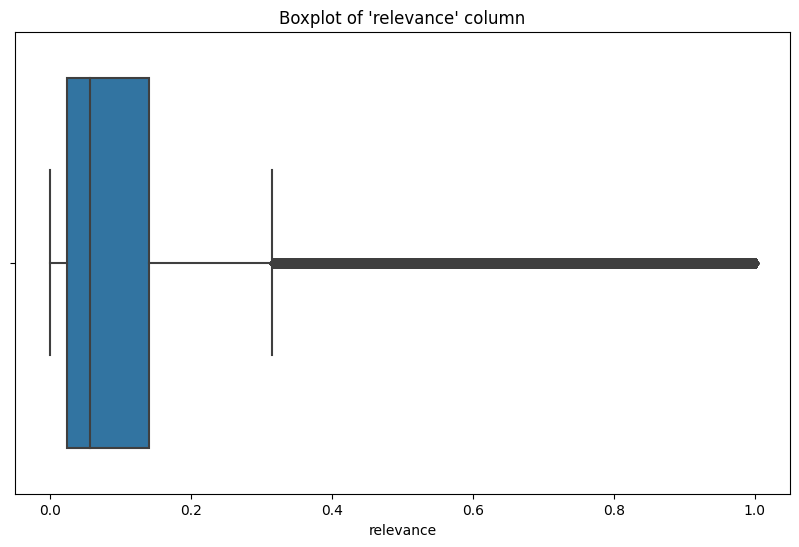

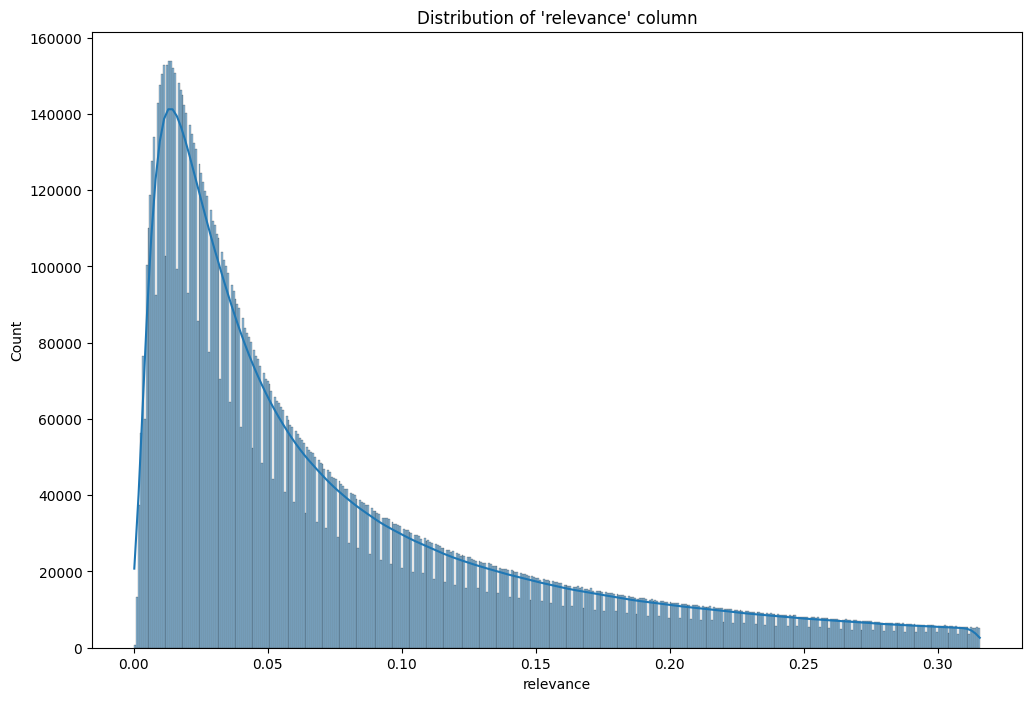

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_genome_scores = pd.read_csv('/kaggle/input/ea-movies/genome_scores.csv')

# 4. Check for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_genome_scores['relevance'])
plt.title("Boxplot of 'relevance' column")
plt.show()

# Decide on how to handle outliers if present
# For example, you can use the IQR method to identify and remove outliers
Q1 = df_genome_scores['relevance'].quantile(0.25)
Q3 = df_genome_scores['relevance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_genome_scores = df_genome_scores[(df_genome_scores['relevance'] >= lower_bound) & (df_genome_scores['relevance'] <= upper_bound)]

# 5. Feature Scaling (if needed)
# If 'relevance' values are on a different scale, consider standardizing or normalizing them
# For example, using Min-Max scaling
df_genome_scores['relevance_scaled'] = (df_genome_scores['relevance'] - df_genome_scores['relevance'].min()) / (df_genome_scores['relevance'].max() - df_genome_scores['relevance'].min())

# 6. Exploratory Data Analysis (EDA)
# Perform EDA to understand the distribution of values in each column
# For example, use histograms
plt.figure(figsize=(12, 8))
sns.histplot(df_genome_scores['relevance'], kde=True)
plt.title("Distribution of 'relevance' column")
plt.show()

# 7. Handling Categorical Data (if needed)
# No categorical variables based on the provided information

# 8. Data Linking with df_train
# Ensure that 'movieId' in df_tags can be linked with 'movieId' in df_train
# Assuming both have a common 'movieId' column
df_train = pd.read_csv('/kaggle/input/ea-movies/train.csv')  # Load your df_train DataFrame
merged_df = pd.merge(df_train, df_genome_scores, on='movieId', how='inner')

# Display the cleaned and linked DataFrame
print("Cleaned and Linked DataFrame:")
print(merged_df)


## Tags
user supplied tags for each movie at a specific timestamp.

In [ ]:
import pandas as pd
df_tags=pd.read_csv("/kaggle/input/ea-movies/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


df_tags has 4 columns:
* userId
* movieId
* tag - tag supplied by user
* timestamp - specific timestamp associated with the tag

In [ ]:
print("df_tags has",len(df_tags),"observations")

df_tags has 1093360 observations


In [ ]:
import pandas as pd

# Read the CSV file
df_tags = pd.read_csv('/kaggle/input/ea-movies/tags.csv')

# Display the number of missing values in each column before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_tags.isnull().sum())

# Replace missing values with empty strings
df_tags_filled = df_tags.fillna('')

# Display the number of missing values in each column after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_tags_filled.isnull().sum())


Missing Values in Each Column (Before Cleaning):
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Missing Values in Each Column (After Cleaning):
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
df_tags = pd.read_csv('/kaggle/input/ea-movies/tags.csv')
# Display the

# Display the first few rows of the DataFrame before performing data quality checks
print("Initial DataFrame:")

# Remove rows with missing values
df_tags_cleaned = df_tags.dropna()

# Display the first few rows of the cleaned DataFrame
print("\nDataFrame After Removing Rows with Missing Values:")
print(df_tags_cleaned.head())

# Check for Duplicates in the Entire DataFrame
duplicate_rows = df_tags_cleaned[df_tags_cleaned.duplicated()]
print("\nDuplicate Rows in the Entire DataFrame:")
print(duplicate_rows)

# Check for Outliers in Numerical Columns (using Z-score)
z_scores = np.abs(zscore(df_tags_cleaned.select_dtypes(include=['number'])))
outliers = (z_scores > 3).all(axis=1)
outliers_pd = df_tags_cleaned[outliers]
print("\nRows with Outliers:")
print(outliers_pd)

# Check for Consistency in Categorical Columns
categorical_columns = df_tags_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df_tags_cleaned[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_values)

# Check for Consistency in Numerical Columns
numerical_columns = df_tags_cleaned.select_dtypes(include=['number']).columns
for col in numerical_columns:
    unique_values = df_tags_cleaned[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_values)

# Check for Zero Values in Numerical Columns
zero_values = (df_tags_cleaned[numerical_columns] == 0).sum()
print("\nZero Values in Numerical Columns:")
print(zero_values)


Initial DataFrame:

DataFrame After Removing Rows with Missing Values:
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

Duplicate Rows in the Entire DataFrame:
Empty DataFrame
Columns: [userId, movieId, tag, timestamp]
Index: []

Rows with Outliers:
Empty DataFrame
Columns: [userId, movieId, tag, timestamp]
Index: []

Unique values in tag:
['classic' 'sci-fi' 'dark comedy' ... 'genre busting' 'the wife did it'
 'cornetto triolgy']

Unique values in userId:
[     3      4     19 ... 162512 162521 162534]

Unique values in movieId:
[   260   1732   7569 ... 163460 163462 189169]

Unique values in timestamp:
[1439472355 1439472256 1573943598 ... 1527518175 1527518181 1527518193]

Zero Values in Numerical Columns:
userId       0
movieId      0
time

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk

# Download WordNet and punkt
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download WordNet, punkt, and stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Load your df_tags DataFrame
df_tags = pd.read_csv('/kaggle/input/ea-movies/tags.csv')







[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet data
nltk.download('wordnet')

# Download the WordNet data
nltk.download('wordnet')
# Assuming df_tags is your DataFrame
# Load your df_tags DataFrame
df_tags = pd.read_csv('/kaggle/input/ea-movies/tags.csv')

# 1. Check for Missing Values
missing_values = df_tags.isnull().sum()
print("Missing Values in Columns:")
print(missing_values)

# 2. Convert 'timestamp' to datetime format
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'], unit='s')  # Assuming it's in Unix timestamp format

# 3. Check for Duplicates
duplicate_rows = df_tags.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# 4. Drop Duplicates (if needed)
df_tags = df_tags.drop_duplicates()

# 5. Check Data Types
data_types = df_tags.dtypes
print("\nData Types:")
print(data_types)

# Tokenization using NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize 'tag' column
df_tags['tag'] = df_tags['tag'].astype(str)  # Ensure 'tag' column is in string format
df_tags['tag_tokens'] = df_tags['tag'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords and perform stemming
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

df_tags['tag_tokens'] = df_tags['tag_tokens'].apply(lambda tokens: [ps.stem(token) for token in tokens if token not in stop_words])
# Lowercasing
df_tags['tag'] = df_tags['tag'].str.lower()

# Removing Special Characters and Punctuation
df_tags['tag'] = df_tags['tag'].str.replace('[^a-zA-Z\s]', '')

# Removing Stopwords
stop_words = set(stopwords.words('english'))
df_tags['tag'] = df_tags['tag'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Stemming
ps = PorterStemmer()
df_tags['tag_stemmed'] = df_tags['tag'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))


# Handling Missing Values
df_tags['tag'].fillna('', inplace=True)

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_tags['tag'])

# Display the cleaned DataFrame
print("\nCleaned DataFrame with Tokenization:")
print(df_tags.head())


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Missing Values in Columns:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Number of Duplicate Rows: 0

Data Types:
userId                int64
movieId               int64
tag                  object
timestamp    datetime64[ns]
dtype: object
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Cleaned DataFrame with Tokenization:
   userId  movieId             tag           timestamp        tag_tokens  \
0       3      260         classic 2015-08-13 13:25:55         [classic]   
1       3      260          sci-fi 2015-08-13 13:24:16    

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download WordNet, punkt, and stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Load your df_tags DataFrame
df_tags = pd.read_csv('/kaggle/input/ea-movies/tags.csv')

# 1. Check for Missing Values
missing_values = df_tags.isnull().sum()
print("Missing Values in Columns:")
print(missing_values)

# 2. Convert 'timestamp' to datetime format
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'], unit='s')  # Assuming it's in Unix timestamp format

# 3. Check for Duplicates
duplicate_rows = df_tags.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# 4. Drop Duplicates (if needed)
df_tags = df_tags.drop_duplicates()

# 5. Check Data Types
data_types = df_tags.dtypes
print("\nData Types:")
print(data_types)

# 6. Handle Categorical Data (if needed)
# Assuming 'tag' is a categorical variable, we can apply tokenization for better analysis.

# Tokenization using NLTK
df_tags['tag'] = df_tags['tag'].astype(str)  # Ensure 'tag' column is in string format
df_tags['tag_tokens'] = df_tags['tag'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords and perform stemming
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

df_tags['tag_tokens'] = df_tags['tag_tokens'].apply(lambda tokens: [ps.stem(token) for token in tokens if token not in stop_words])


# Handling Missing Values

# Display the cleaned DataFrame
print("\nCleaned DataFrame with Tokenization:")
print(df_tags.head())


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Missing Values in Columns:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Number of Duplicate Rows: 0

Data Types:
userId                int64
movieId               int64
tag                  object
timestamp    datetime64[ns]
dtype: object

Cleaned DataFrame with Tokenization:
   userId  movieId               tag           timestamp        tag_tokens
0       3      260           classic 2015-08-13 13:25:55         [classic]
1       3      260            sci-fi 2015-08-13 13:24:16          [sci-fi]
2       4     1732       dark comedy 2019-11-16 22:33:18    [dark, comedi]
3       4     1732    great di

## Test Data

In [ ]:
import pandas as pd
df_test=pd.read_csv("/kaggle/input/ea-movies/test.csv")
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


The test data set has 2 columns:
*userId
*movieId


In [ ]:
print("The testing set has", str(len(df_test)),"observations")

The testing set has 5000019 observations


In [ ]:
df_test=pd.read_csv("/kaggle/input/ea-movies/test.csv")

In [ ]:

import pandas as pd

# Assuming you have loaded or created df_train
df_train = pd.read_csv('/kaggle/input/ea-movies/train.csv')  # Replace 'path_to_df_train.csv' with the actual file path

# Display the head of df_train
df_train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


df_train has four columns:
* userId
* movieId
* rating
* timestamp

In [ ]:
print("The training set has", str(len(df_train)),"observations")

The training set has 10000038 observations


In [ ]:
import pandas as pd

df_train=pd.read_csv('/kaggle/input/ea-movies/train.csv')
# Display the number of missing values in each column before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_train.isnull().sum())

# Drop rows with missing values
df_train_cleaned = df_train.dropna()

# Display the number of missing values in each column after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_train_cleaned.isnull().sum())


Missing Values in Each Column (Before Cleaning):
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Each Column (After Cleaning):
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


## Sample Submision

In [ ]:
df_sample_submission=pd.read_csv("/kaggle/input/ea-movies/sample_submission.csv")
df_sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [ ]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB


In [ ]:
import pandas as pd


# Display the number of missing values in each column before cleaning
print("Missing Values in Each Column (Before Cleaning):")
print(df_sample_submission.isnull().sum())

# Drop rows with missing values
df_sample_submission_cleaned = df_sample_submission.dropna()

# Display the number of missing values in each column after cleaning
print("\nMissing Values in Each Column (After Cleaning):")
print(df_sample_submission_cleaned.isnull().sum())


Missing Values in Each Column (Before Cleaning):
Id        0
rating    0
dtype: int64

Missing Values in Each Column (After Cleaning):
Id        0
rating    0
dtype: int64


## Exploratory Data Analysis
discovery phase and data understanding

## Distribution Of Ratings

Descriptive statistics

In [ ]:
import pandas as pd

# Load the datasets with the correct file paths
df_imdb = pd.read_csv('/kaggle/input/ea-movies/imdb_data.csv')
df_movies = pd.read_csv('/kaggle/input/ea-movies/movies.csv')

# Merge the datasets based on the 'movieId' column
merged_df = pd.merge(df_imdb, df_movies, on='movieId', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df)


Merged DataFrame:
       movieId                                         title_cast  \
0            1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1            2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2            3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3            4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4            5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   
...        ...                                                ...   
24861   131254  Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...   
24862   131256  Rick Kavanian|Axel Stein|Eva Habermann|Christo...   
24863   131258  Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...   
24864   131260  Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...   
24865   131262  Sophie Lane Curtis|Kelly Reilly|Graham Phillip...   

                  director  runtime        budget  \
0            John Lasseter     81.0   $30,000,000   
1       Jonathan Hensleigh    104.0   $65,000,0

In [ ]:
import pandas as pd

# Assuming df_train is your DataFrame
df_train = pd.read_csv("/kaggle/input/ea-movies/train.csv")  # Make sure to replace with your actual file path
result_df = pd.DataFrame(df_train['rating'].describe().apply(lambda x: round(x, 2)), columns=['rating']).rename(columns={'rating': 'Statistic'})

# Now you can use result_df for further processing or display
pd.DataFrame(df_train['rating'].describe().apply(lambda x: round(x,2)),
             columns=['rating']).rename(columns={'rating':'Statistic'})

,Statistic
count,10000038.00
mean,3.53
std,1.06
min,0.50
25%,3.00
50%,3.50
75%,4.00
max,5.00


* The average rating of all the movies in our dataset is 3.53.
* The median (middle value) is 3.5 which is slighly less than the mean.
* The standard deviation (spread around the average) is  1.06.
* The lowest rating is 0.5 and the highest rating is 5.
* The lower quantile (bottom 25 cut-off point) is 3 and the upper quantile (top 25 cut-off point) is 4.


In [ ]:
# Display the column names
print(df.columns)

# Display unique values in each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Unique values in userId: [  5163 106343 146790 ...  79096  14908 102344]
Unique values in movieId: [ 57669      5   5459 ... 206347 196867  97148]
Unique values in rating: [4.  4.5 5.  2.  3.  1.  3.5 2.5 0.5 1.5]
Unique values in timestamp: [1518349992 1206238739 1076215539 ... 1521235092 1227674807 1479921530]


In [ ]:
# Assuming df_train is your DataFrame
df_train = pd.read_csv("/kaggle/input/ea-movies/train.csv")  # Make sure to replace with your actual file path

rating_counts = pd.DataFrame(df_train.groupby(['rating']).count().reset_index().rename(columns={'userId': 'count'})[['rating', 'count']])


In [ ]:
# Assuming you have a DataFrame named df_train
df_train = pd.read_csv("/kaggle/input/ea-movies/train.csv")

rating_counts = df_train.groupby(['rating']).size().reset_index(name='count')


In [ ]:
import pandas as pd

# Assuming you have a CSV file named 'train.csv' in the specified path
df_train = pd.read_csv("/kaggle/input/ea-movies/train.csv")

# Group by 'rating' column and count occurrences
rating_counts = df_train['rating'].value_counts().reset_index(name='count')


We use the dataframe above to obtain a bargraph showing the distribution of ratings

In [ ]:
import pandas as pd
df_train = pd.read_csv("/kaggle/input/ea-movies/train.csv")

# Assuming you have loaded or created the DataFrame df
# Check if 'rating' column exists
if 'rating' in df.columns:
    rating_counts = df_train['rating'].value_counts().reset_index().rename(columns={'index': 'rating', 'rating': 'count'})

    # Import the pyplot module from matplotlib
    plot = plt.figure(figsize=(15, 10))

    # Rest of your plotting code using rating_counts

else:
    print("Column 'rating' not found in the DataFrame.")


Column 'rating' not found in the DataFrame.


In [ ]:
#Plot showing the distribution of counts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_train=
# Assuming you have loaded or created the DataFrame df
rating_counts = df_train['rating'].value_counts().reset_index().rename(columns={'index': 'rating', 'rating': 'count'})

# Import the pyplot module from matplotlib
plot = plt.figure(figsize=(15, 10))
a = sns.barplot(x='rating',y='count',data=rating_counts,palette='crest')
a.set_title('The Distribution of Ratings',fontsize=20)

#Obtaining percentages on top of bars
n_obs = [i.get_height() for i in a.patches]
total = sum(n_obs)

for i in a.patches:
    # get_x pulls left or right; get_height pushes up or down
    a.text(i.get_x()+i.get_width() / 2, i.get_height()+0.5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15,
                color='black',ha='center')

plt.show()


ValueError: Could not interpret input 'rating'

<Figure size 1500x1000 with 0 Axes>

In [ ]:
rating_counts = df['userRating'].value_counts().reset_index().rename(columns={'index': 'rating', 'userRating': 'count'})


KeyError: 'userRating'

* The most common rating given by users (26.5%) is 4.
* The ratings appear to be skewed to the left (evidenced by the long tail to the left). This means that there are a few movies who received lower ratings compared to those that received higher ratings


### The we calculated the coefficient of skewness to check our above findings.

In [ ]:
#calcuting skew
print('The Coefficient of Skewness is : '+str(rating_counts['count'].skew()))

The Coefficient of Skewness is : 0.9316640025763427


This contradicts with our suspicion that the distribution is negatively skewed. The contradiction can be explained by the fact that the distribution appears to have 2 peaks (slightly bimodal).

In [ ]:
# Example: Define and use rating_counts
rating_counts = {'5 stars': 100, '4 stars': 75, '3 stars': 50}

# Now you can use rating_counts in your code
total_ratings = sum(rating_counts.values())
print(f'Total ratings: {total_ratings}')

# Delete rating_counts if needed
del rating_counts

# After deleting, if you try to access rating_counts again, you'll get a NameError
# For example, the following line would raise a NameError
# print(rating_counts)


Total ratings: 225


#### Number of Unique Users

In [ ]:
print('Train df has '+str(df_train['userId'].nunique())+' unique users')

Train df has 162541 unique users


## Rating by Number Of Ratings

We plotted the average ratings of movies as a functions of how many times they were rated

/tmp/ipykernel_1973/802765578.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a = sns.scatterplot(x=count_movies['rating'], y=ave_movie_rating['rating'], palette='crest')


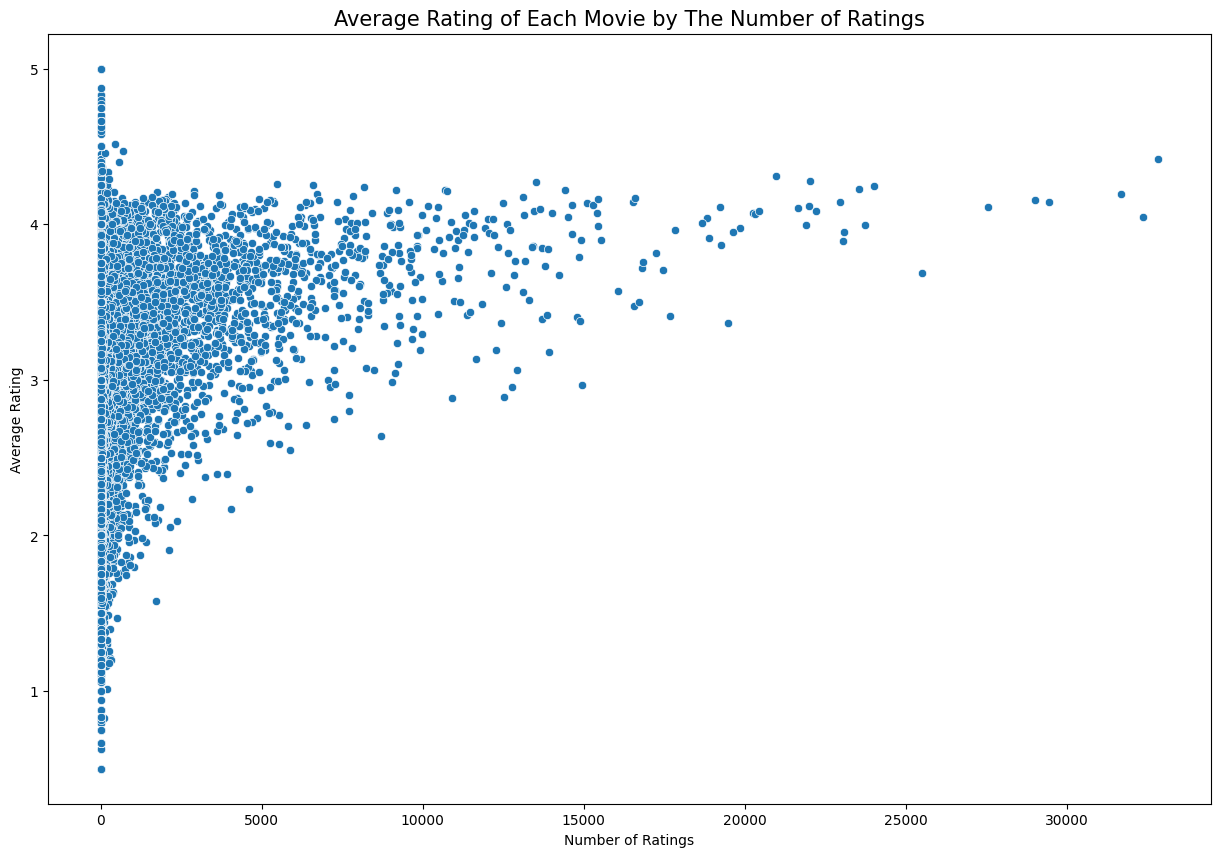

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame
ave_movie_rating = df_train.groupby('movieId')['rating'].mean().reset_index()
count_movies = df_train.groupby('movieId')['rating'].count().reset_index()

# Plotting scatter plot
plt.figure(figsize=(15, 10))
plt.title("Average Rating of Each Movie by The Number of Ratings", fontsize=15)

a = sns.scatterplot(x=count_movies['rating'], y=ave_movie_rating['rating'], palette='crest')
a.set_xlabel('Number of Ratings')
a.set_ylabel('Average Rating')

plt.show()


* The ratings of movies that have a smaller number of ratings are widely spread. A possible explanation for this would be law of large numbers, it dictates that movies that are frequently rated produce more stable estimates of the true average rating.

## Most Common Genre

In [ ]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])


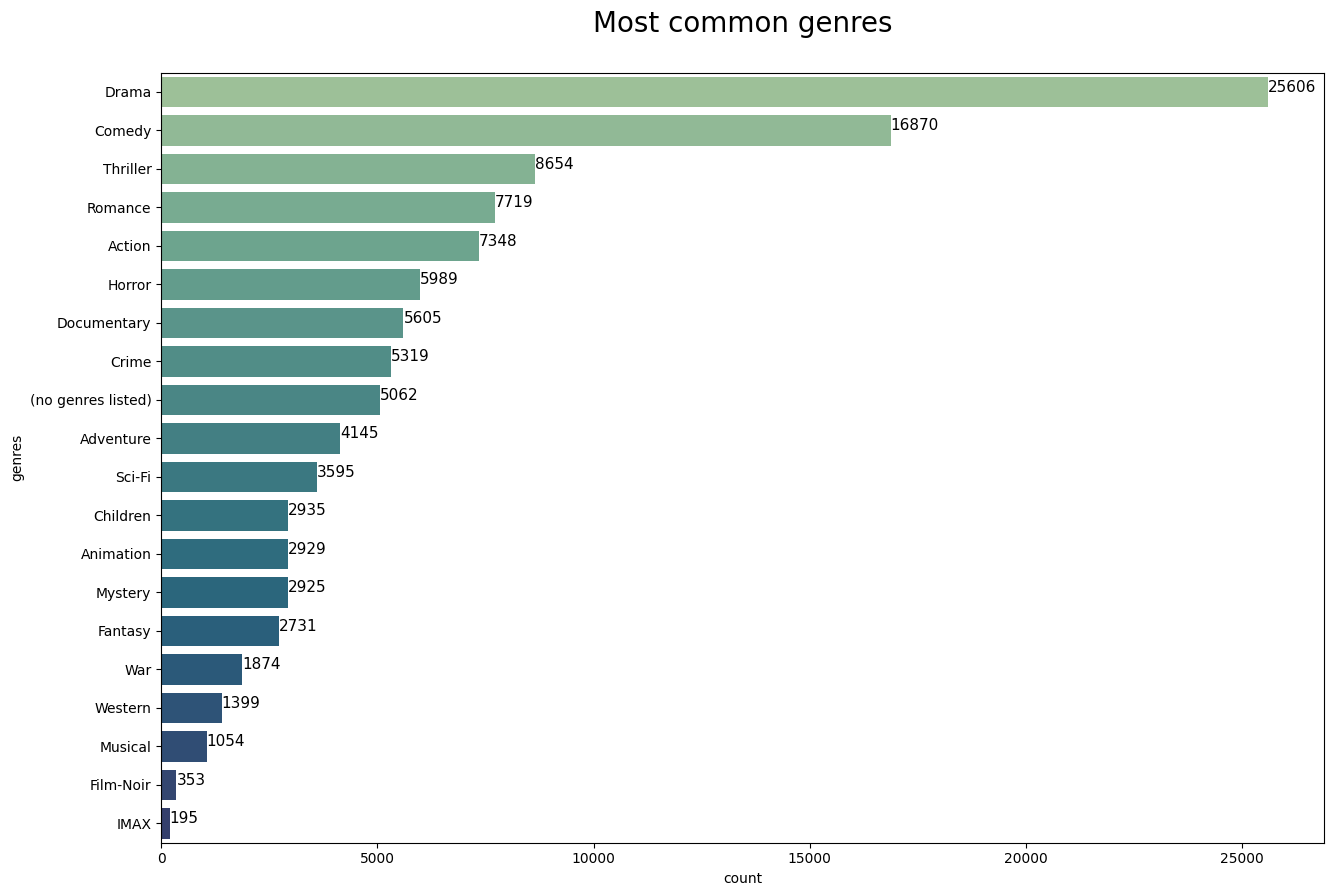

In [ ]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
a = sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='crest')

for p in a.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()


* The top 3 occuring genres are Drama, Comedy, and Thrillers.
* Musical, Film-Noir and IMAX movies were the least represented in our dataset


## Average Rating Per Genre

In [ ]:
#joining train_df and movie_genres
rating_genre = pd.merge(df_train,movies_genres, on='movieId',how='left')

#dataframe of average rating according to genr
ave_per_genre = rating_genre.groupby(['genres'])['rating'].mean().reset_index()

#sorting values from largest to smallest
ave_per_genre = ave_per_genre.sort_values(by='rating',ascending=False).reset_index()

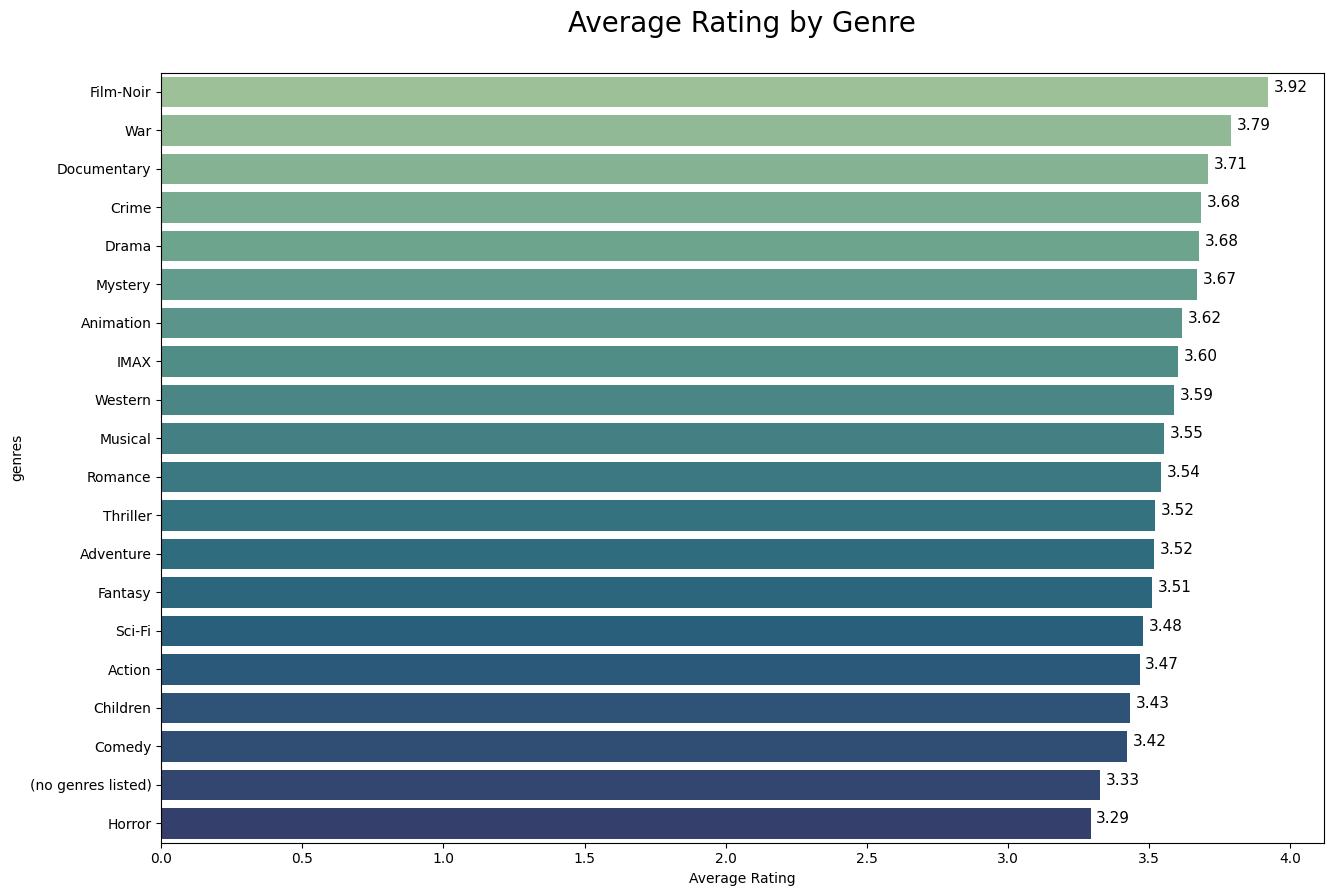

In [ ]:
#horizontal barchart plotting based on the above
plot = plt.figure(figsize=(15, 10))
plt.title('Average Rating by Genre\n', fontsize=20)
a = sns.barplot(x='rating',y="genres", data=ave_per_genre,
              palette='crest')

#creating horizontal label
a.set_xlabel('Average Rating')

#adding annotations to bar
for p in a.patches:
        value = '{:.2f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()

* The average ratings according to genre were in a narrow range
* Film-Noirs, War Movies , and Documentaries recieved the highest average ratings.
* Film-Noirs received the highest rating even though they are the second lowest reviewed movies.
* Comedies and Horrors received the lowest ratings. Possible explanation: too predictable?
* Comedies recieved the second lowest average rating even though they were in the top 2 reviewed movies.

## Do Budget and/ or Runtime Affect Ratings

In [ ]:
import pandas as pd
import re  # Import the 're' module
df_imdb_data=pd.read_csv("/kaggle/input/ea-movies/imdb_data.csv")
df_train=pd.read_csv("/kaggle/input/ea-movies/train.csv")
# Assuming df_train and

In [ ]:
# Merging the dataframe to obtain the budget
import pandas as pd
import re  # Import the 're' module
df_imdb_data=pd.read_csv("/kaggle/input/ea-movies/imdb_data.csv")
df_train=pd.read_csv("/kaggle/input/ea-movies/train.csv")
# Assuming df_train and df_imdb_data are your DataFrames
df_imdb_data = pd.merge(df_train, df_imdb_data[['movieId', 'budget']], on='movieId', how='left')
df_train = pd.merge(df_train, df_imdb_data[['movieId', 'budget']], on='movieId', how='left')

# String the dollars
pattern = r'\$'
df_imdb_data['budget'] = df_imdb_data['budget'].apply(lambda x: re.sub(pattern, '', str(x)))

# Stripping the commas
pattern = r'\,'
df_imdb_data['budget'] = df_imdb_data['budget'].apply(lambda x: re.sub(pattern, '', str(x)))

# Convert to numerical value
df_imdb_data['budget'] = pd.to_numeric(df_imdb_data['budget'], errors='coerce')

# Budget according to rating
budget_rating = df_imdb_data.groupby(['rating'])['budget'].mean().reset_index()


In [ ]:
#merging dataframe to obtain runtime
pd_runtime = pd.merge(df_train,df_imdb_data[['movieId','runtime']], on ='movieId', how='left')

#budget according to rating
runtime_rating = pd_runtime.groupby(['rating'])['runtime'].mean().reset_index()

In [ ]:
#scatter plot of rating and  Budget
import pandas as pd
import re
import matplotlib.pyplot as plt  # Import the 'matplotlib.pyplot' module

# Assuming df_train and df_imdb_data are your DataFrames
df_imdb_data = pd.merge(df_train, df_imdb_data[['movieId', 'budget']], on='movieId', how='left')

# Rest of your code...

# Scatter plot of rating and Budget
fig, axes = plt.subplots(1, 2, figsize=(18, 6), squeeze=False)
plot1 = sns.scatterplot(x='budget', y='rating', data=budget_rating, s=100, color='red', ax=axes[0, 0])
# You can add more configurations to your plot1 if needed

# Continue with the rest of your code...

fig, axes = plt.subplots(1,2, figsize=(18, 6), squeeze=False)

plot1 = sns.scatterplot(x='budget', y='rating', data =budget_rating, s=100, color='red', ax=axes[0,0])
plot2 = sns.scatterplot(x='runtime',y='rating', data=runtime_rating, s=100, ax =axes[0,1])
plot1.set_title('Budget vs. Rating')
plot2.set_title('Runtime vs. Rating')

plt.show()

* It seems that there is no obvious relationship between the budget of the movie and the rating
* With the exception of one point, as runtime increases the rating also increase in a linear fashion

## Most Rated Movies

This can be used as an approximation for how many people watched the movies

In [ ]:
movies = pd.merge(df_train, df_movies[['movieId','title']], on='movieId', how="left")
movie_count = movies.groupby(['title'])['rating'].count().reset_index().rename(columns={'rating':'count'})

plot = plt.figure(figsize=(15, 10))
plt.title('20 Most Rated Movies', fontsize=20)
a = sns.barplot(x='count',
                y="title",
                data=movie_count.sort_values(by='count',ascending =False).head(20),
                palette='crest')

#creating horizontal label
a.set_xlabel('Number of Ratings', fontsize=14)
a.set_ylabel('Title', fontsize=14)

#adding annotations to bar
for p in a.patches:
        value = int(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()

NameError: name 'pd' is not defined

Most of the movies on this list are critically acclaimed. The most reviewed movie "The Shawshank Redemption" holds the number one spot on the imdb top 250 movies of all time. The same applies all the titles on this list, most of them are in the 30. Here's a link to the full list [click](https://www.imdb.com/search/title/?groups=top_250&sort=user_rating)

In [ ]:
del movies, movie_count, plot, a
gc.collect()

## Filtering Movies According To Number Of Ratings
We filters the movies by setting a floor on the number of ratings. This is to ensure a fair comparison between the lead actors and between directors.

In [ ]:
min_movie_ratings = 500
filter_movies = df_train['movieId'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()
df_train_filtered = df_train[df_train['movieId'].isin(filter_movies)]
df_train_filtered.shape

## Top Rated Movies

In [ ]:
movie_rating_merge = pd.merge(df_train_filtered,df_movies[['movieId','title']],on='movieId', how='left')
movie_rating = movie_rating_merge.groupby('title')['rating'].mean().reset_index()

plot = plt.figure(figsize=(15, 10))
plt.title('Top 20 Rated Movies\n', fontsize=20)
a = sns.barplot(x='rating',
                y="title",
                data=movie_rating.sort_values(by='rating',ascending =False).head(20),
                palette='crest')

#creating horizontal label
a.set_xlabel('Average Rating', fontsize=14)
a.set_ylabel('Title', fontsize=14)

#adding annotations to bar
for p in a.patches:
        value = '{:.2f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()

These movies correspond to those that are part of the imdb top 250 movies, they are critically acclaimed and our data confirms that. Movies like The Shawshank Redemption,The Godfather, The Usual Suspects,12 Angry Men and Schindler's List are examples of movies that appear on the top 20 of both lists. Click [here](https://www.imdb.com/search/title/?groups=top_250&sort=user_rating) to view the  imdb top 250 movies.

## Worst Rated Movies

In [ ]:
plot = plt.figure(figsize=(15, 10))
plt.title('Bottom 20 Rated Movies\n', fontsize=20)
a = sns.barplot(x='rating',
                y="title",
                data=movie_rating.sort_values(by='rating').head(20),
                palette='crest')

#creating horizontal label
a.set_xlabel('Average Rating', fontsize=14)
a.set_ylabel('Title', fontsize=14)

#adding annotations to bar
for p in a.patches:
        value = '{:.2f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()

The bottom movies, since we limited our analysis to movies that recieved 500 ratings or more we get a list of familiar movies, an example "Stop! Or My Mom Will Shoot" which is the 3rd worst rated movies and is one of the lesser popular Sylvester Stallone movies, the comment that received the highest number on imdb of upvotes on imdb is "The story was corny, the plot was predictable. The supporting cast was lacking. This is not a thriller or an intelligent movie. It is a B comedy., at best." [link](https://www.imdb.com/title/tt0105477/?ref_=nv_sr_srsg_0) and this is reflected in the rating that it received. Other movies appearing on the list are titles such as Catwoman and Fifty Shades of Grey that are based on novels/comic books received lower ratings because the public/critics felt that they didn't capture the essence of the books/comics that they are based on.

In [ ]:
del movie_rating_merge, movie_rating, plot, a
gc.collect()

## Top 50 Occuring Cast Members

In [ ]:
import re
import pandas as pd

# Assuming df_imdb is your DataFrame
# Load your df_imdb DataFrame
df_imdb = pd.read_csv('/kaggle/input/ea-movies/imdb_data.csv')

# Check if 'title_cast' column exists in the DataFrame
if 'title_cast' in df_imdb.columns:
    # Apply regular expression patterns to clean 'title_cast' column
    df_imdb['title_cast'] = df_imdb['title_cast'].apply(lambda x: re.sub(r'\s{1,}', '', str(x)))
    df_imdb['title_cast'] = df_imdb['title_cast'].apply(lambda x: re.sub(r'\.|-', '', str(x)))
else:
    print("Error: 'title_cast' column not found in the DataFrame.")

# Display the modified DataFrame
print(df_imdb.head())


In [ ]:
#creating empty pandas dataframe
df_imdb_mod =pd.DataFrame({})

# joining the names and surnames
pattern = r'\s{1,}'
df_imdb_mod['title_cast'] = df_imdb['title_cast'].apply(lambda x: re.sub(pattern, '', str(x)))

pattern =r'\.|-'
df_imdb_mod['title_cast'] = df_imdb_mod['title_cast'].apply(lambda x: re.sub(pattern, '', str(x)))

#tokenizing the names and creating new column (for later)
df_imdb_mod['title_cast_sep'] = df_imdb_mod['title_cast'].str.split('|')

# joining the names back to strings
sep=" "
df_imdb_mod['title_cast'] = df_imdb_mod['title_cast_sep'].apply(lambda x : sep.join(x))

In [ ]:
#string containing all cast members
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the 'title_cast' column to strings
df_imdb['title_cast'] = df_imdb['title_cast'].astype(str)

# String containing all cast members
all_cast = "".join([cast for cast in df_imdb['title_cast']])

# Creating word cloud
fig = plt.figure(figsize=(18, 10))
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_cast)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

all_cast ="".join([cast for cast in df_imdb['title_cast']])

#creating wordcloud
fig = plt.figure(figsize=(18,10))

wc = WordCloud(background_color="white",
               colormap="Dark2", max_font_size=70,
               random_state=42,max_words=50)

wc.generate(all_cast)
plt.title('Top 50 Occurring Actors', fontsize=20)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Household names such as Steve Buscemi, who is credited with 166 acting roles accoring to imdb, click [here](https://www.imdb.com/name/nm0000114/) for full bio. Keith David is credited with 366 roles according to the same source, for more info : [here](https://www.imdb.com/name/nm0202966/?ref_=fn_al_nm_1). Richard Jenkins has 115 acting roles under his belt, full bio [here](https://www.imdb.com/name/nm0420955/?ref_=nv_sr_srsg_0). Samuel L. Jackson has 195 acting roles, full bio [here](https://www.imdb.com/name/nm0000168/?ref_=nv_sr_srsg_0).

## Now Let Us Look At The Lead Actors
We are assuming that the lead actor/actress is the first name mentioned on title credits. And the rating that the movie gets will be used as a proxy for the rating of the lead actor.


In [ ]:
del all_cast, fig, wc
gc.collect()

In [ ]:
import pandas as pd


# Joining df_train_filtered and part of df_imdb
cast_rating = pd.merge(df_train, df_imdb[['movieId', 'title_cast']], on='movieId', how='left')

# Ensure the 'title_cast' column is a string and handle missing values
cast_rating['title_cast'] = cast_rating['title_cast'].astype(str).fillna('')

# Convert lead actor names to lowercase
cast_rating['title_cast'] = cast_rating['title_cast'].str.lower()
# Creating a list containing cast, separator='|'
cast_rating['title_cast'] = cast_rating['title_cast'].str.split('|')

# Taking the first actor of the list
cast_rating['lead_actor'] = cast_rating['title_cast'].apply(lambda x: x[0] if x else '')

# DataFrame containing the lead characters and their average rating
lead_rating = cast_rating.groupby('lead_actor')['rating'].mean().reset_index()

# Print the first few rows of the resulting DataFrame
print(lead_rating.head())


## Top 10 Rated Lead Actors

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt')

# Assuming df_train_filtered and df_imdb are your DataFrames
# Replace 'movieId' with the correct column name used for merging

# Joining df_train_filtered and part of df_imdb
cast_rating = pd.merge(df_train, df_imdb[['movieId', 'title_cast']], on='movieId', how='left')

# Ensure the 'title_cast' column is a string and handle missing values
cast_rating['title_cast'] = cast_rating['title_cast'].astype(str).fillna('')

# Creating a list containing cast, separator='|'
cast_rating['title_cast'] = cast_rating['title_cast'].str.split('|')

# Taking the first actor of the list
cast_rating['lead_actor'] = cast_rating['title_cast'].apply(lambda x: x[0] if x else '')

# Convert lead actor names to lowercase
cast_rating['lead_actor'] = cast_rating['lead_actor'].str.lower()

# Remove special characters from lead actor names
cast_rating['lead_actor'] = cast_rating['lead_actor'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Tokenize lead actor names
cast_rating['lead_actor_tokens'] = cast_rating['lead_actor'].apply(word_tokenize)

# DataFrame containing the lead characters, their tokens, and average rating
lead_rating = cast_rating.groupby('lead_actor_tokens')['rating'].mean().reset_index()

# Print the first few rows of the resulting DataFrame
print(lead_rating.head())


In [ ]:
#average ratings of top 10 rated lead actors
plot = plt.figure(figsize=(15, 10))
plt.title('Top 10 Rated Lead Actors\n', fontsize=20)
a = sns.barplot(x='rating',
                y="lead_actor",
                data=lead_rating.sort_values(by='rating',ascending =False).head(10),
                palette='crest')

#creating horizontal label
a.set_xlabel('Average Rating')
a.set_ylabel("Lead Actor")
#adding annotations to bar
for p in a.patches:
        value = '{:.2f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()

Stephen Baldwin highest rated lead actor according proxy that we used and is primarily known for the movie "The Usual Suspect", it has the 5th highest average rating (4.28/5) in our filtered dataset. Rumi Hiiragi is known for "Spirited Away" which is the 12th highest rated movie in our filtered dataset. Tim Roth appeared in "Pulp Fiction" which is the 19th highest rated movie.

## Bottom 10 Lead Actors

In [ ]:
#average ratings of bottom 10 rated lead actors
plot = plt.figure(figsize=(15, 10))
plt.title('Bottom 10 Rated Lead Actors\n', fontsize=20)
a = sns.barplot(x='rating',
                y="lead_actor",
                data=lead_rating.sort_values(by='rating').head(10),
                palette='crest')

#creating horizontal label
a.set_xlabel('Average Rating')

#adding annotations to bar
for p in a.patches:
        value = '{:.2f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()

Shaquile O'Neal is the second bottom 10 rated actor according to the proxy and known for the movie "Kazaam", with an average rating of 1.77 in our filtered dataset. Mel B is the third bottom rated actor and known for the movie "Spice World", with average rating of 1.79. Mark Addy is the forth bottom rated actor and known for "Flintstones in  Viva Rock in Vegas", with the average rating of 1.83.

In [ ]:
del cast_rating , lead_rating, plot, a
gc.collect()

## Most Frequently Occuring Directors

In [ ]:
import pandas as pd

# Add this import statement
import re

from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Add this import statement

# Rest of your code
# ...

# Creating a word cloud for top occurring directors
fig = plt.figure(figsize=(18, 10))
ign = ['nan', 'Seefullsummary']
wc = WordCloud(stopwords=ign, background_color="white",
               colormap="Dark2", max_font_size=70,
               random_state=42, max_words=50)
wc.generate(directors)
plt.title('Top 50 Occurring Directors', fontsize=20)

# Rest of your code
# ...


# Joining names and surnames
pattern = r'\s{1,}'
pd_imdb_data['director'] = pd_imdb_data['director'].apply(lambda x: re.sub(pattern, '', str(x)))

# Removing commas and dashes
pattern = r'\.|\-'
pd_imdb_data['director'] = pd_imdb_data['director'].apply(lambda x: re.sub(pattern, '', str(x)))

# Rest of your code
# ...

#joining names and surnames
pattern = r'\s{1,}'
pd_imdb_data['director'] = pd_imdb_data['director'].apply(lambda x: re.sub(pattern, '', str(x)))

# removing commas and dashes
pattern = r'\.|\-'
pd_imdb_data['director'] = pd_imdb_data['director'].apply(lambda x: re.sub(pattern, '', str(x)))

directors = ' '.join([str(d) for d in pd_imdb_data['director']])

#creating wordcloud
fig = plt.figure(figsize=(18,10))
ign =['nan','Seefullsummary']
wc = WordCloud(stopwords=ign, background_color="white",
               colormap="Dark2", max_font_size=70,
               random_state=42,max_words=50)

wc.generate(directors)
plt.title('Top 50 Occurring Directors', fontsize=20)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'directors' is not defined

<Figure size 1800x1000 with 0 Axes>

We get prominent directors such as Woody Allen, who has directed 55 movies over the span of his career according to imdb, for boi click [here](https://www.imdb.com/name/nm0000095/).
        Luc Besson is has directed over 65 movies/series according to imdb, for bio click [here](https://www.imdb.com/name/nm0000108/?ref_=nv_sr_srsg_0).
        Stephen King is also a household name and has directed 15 movies/screenplays and has 325 credits as a writer, for bio click [here](https://www.imdb.com/name/nm0000175/?ref_=nv_sr_srsg_0).

In [ ]:
del df_imdb_mod, directors, fig, wc
gc.collect()

## Now Let Us Look At The Tp 10 Rated Directors

In [ ]:
#joining df_train and df_imdb using the movieId column
pd_train=pd.read_csv("/kaggle/input/ea-movies/train.csv")
pd_imdb_data=pd.read_csv("/kaggle/input/ea-movies/imdb_data.csv")
director_rating = pd.merge(pd_train,pd_imdb_data[['movieId','director']], on='movieId', how='left')
director_rating = director_rating.groupby('director')['rating'].mean().reset_index()

#Obtaing Top 10
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Add this import statement

# Rest of your code
# ...

# Grouping by director and calculating the average rating
director_rating = cast_rating.groupby('director')['rating'].mean().reset_index()

# Obtaining Top 10
plot = plt.figure(figsize=(15, 10))
plt.title('Top 10 Rated Directors\n', fontsize=20)
a = sns.barplot(
    x='rating',
    y="director",
    data=director_rating.sort_values(by='rating', ascending=False).head(10),
    palette='crest'
)

plt.show()

plot = plt.figure(figsize=(15, 10))
plt.title('Top 10 Rated Directors\n', fontsize=20)
a = sns.barplot(x='rating',
                y="director",
                data=director_rating.sort_values(by='rating',ascending =False).head(10),
                palette='crest')

#creating horizontal label
a.set_xlabel('Average Rating')

#adding annotations to bar
for p in a.patches:
        value = '{:.2f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()



We get critically acclaimed directors such as Steven Spielberg, who is knowned for the "Schindler's List" which is
        number 8 on the imdb 250 movies of all time and the 9th highest rated movie according to our filtered dataset. The top spot is held
        by Chuck Palahniuk who is known for "Fight Club" which is also a critically acclaimed movie and is the 11th highest rated movie in our
        dataset

## Bottom 10 Rated Directors

In [ ]:
#bottom 10 rated directors
plot = plt.figure(figsize=(15, 10))
plt.title('Bottom 10 Rated Directors\n', fontsize=20)
a = sns.barplot(x='rating',
                y="director",
                data=director_rating.sort_values(by='rating').head(10),
                palette='crest')

#creating horizontal label
a.set_xlabel('Average Rating')

#adding annotations to bar
for p in a.patches:
        value = '{:.2f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(value, (x, y),fontsize=11)
plt.show()

The worst rated director is Corey Mandell who is known for "Battlefield Earth" which is the worst rated movie according to our filtered dataset. Steven Paul is known for the movie "Baby Geniuses" and is the second worst rated director. The same applies to most of the names on this list, there's a near perfect association between the worst movies obtained earlier and the worst directors.

In [ ]:
del director_rating, df_train_filtered, plot, a
gc.collect()

## Most Common Tags

In [ ]:
# #top 10 movie tags by occurence
tags = df_tags.groupby(['tag'])['movieId'].count().reset_index().rename(columns={'movieId':'count'})
tags.sort_values(by='count',ascending=False).head(10)

aIt is not surprising that the most common tags are attributes of movies that correspond to general themes such as
        "twist ending" and "based on a book" and features such as genres are expected to be common across multiple movies.

## Least Common Tags

In [ ]:
# #bottom 10 movie tags
tags.sort_values(by='count',ascending=False).tail(10)

Least common tags are associations with the author which could possibly apply only movies that are based on a book. And that the author is most likely to correspond to only one movie.

## Modelling Phase
Here you can apply the models outline in the Intro to Recommender Notebook. You only need to apply one version
be it Content based or Collabrative method


## Collaborative Filtering Models
### Advantages
* can be used for any item-no feature selection needed
### Disadvantages
* cold start problem- needs enough users in the system to find a match
* user/rating matrix is sparse-it is hard to find users that have rated the same items
* first rater-can not generate recommendations for unrated items
* popularity bias-tends to recommend the most popular items
source: https://www.youtube.com/watch?v=6BTLobS7AU8

We are going to implement the following algorithms:

* SVD
    
    The singular value decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular values. The SVD is used widely both in the calculation of other matrix operations, such as matrix inverse, but also as a data reduction method in machine learning.
* NMF

    Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect.
* NormalPredictor
   Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal. The prediction $\hat{r}_{ui}$ iis generated from a normal distribution $N(\hat{\mu},\hat{\sigma}^2)$ where $\mu$ and $\hat{\sigma}^2$ are estimated from training data using Maximum Likelihood Estimations:
     $$\hat{\mu}=\frac{1}{|R_{train}|}\sum_{r_{ui}\in R_{train}}r_{ui}
     $$
   $$ \hat{\sigma}=\sqrt{\sum\frac{(r_{ui}-\hat{\mu})^2}{|R_{train}|}}$$
    
* BasenlineOnlY

    A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset.
* CoClustering

    Biclustering algorithms simultaneously cluster rows and columns of a data matrix. These clusters of rows and columns are known as biclusters. Each determines a submatrix of the original data matrix with some desired properties.

## Data Preprocessing

In [ ]:
from surprise import Dataset, Reader
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named df_train
# Setting rating scale
reader = Reader(rating_scale=(0.5, 5))

# Parsing df_train
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

trainset = data.build_full_trainset()

# Creating dummy rating column for df_test
df_test['rating'] = 0

# Parsing df_test
test_processed = Dataset.load_from_df(df_test[['userId', 'movieId', 'rating']], reader)

# Converting test dataframe to list of tuples
train, test = train_test_split(test_processed, test_size=1.0, shuffle=False)


## Model Comparison
### Evaluation Metrics:Root Mean Squared Error(RMSE)
Assesses the performance of the model by using the average deviation between of the predicted outcome from the actual come. It is given by the square root of the average squared distance between the predicted outcome and the actual outcome. The range of rmse is $\mathbb{R}^{+}$ (positive real numbers). Smaller values represent a better fit. The formula is given by:
$$RMSE=\sqrt{\frac{\sum_{i}^{n}(y_i-\hat{y}_i)^2}{N}}$$
where:
 * $y_i$ is the actual outcome of the $i^{th}$ observation
 * $\hat{y}_i$ is the predicted outcome of the $i^{th}$ observation
 * N number of observations

In [ ]:
# # Apply your modelling here
def train_multi(data, model_list):
    """This functions trains multiple models
    @data : surprise dataframe
    @model_list : list of models to be trained
    returns : a dataframe containing the average rmse of each model, train_fit_time, test_fit_time
    """

    benchmark = []
    # Iterate over all algorithms
    for model in model_list:
        # Perform cross validation
        results = cross_validate(model, data, measures=['RMSE'], cv=3, verbose=False)

        # Get results & append algorithm name
        tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        tmp = tmp.append(pd.Series([str(model).split(' ')[0].split('.')[-1]], index=['model']))
        benchmark.append(tmp)
    return pd.DataFrame(benchmark).set_index('model').sort_values('test_rmse')

df_results = train_multi(data, model_list = [SVD(),
                                             NMF(),
                                             NormalPredictor(),
                                             BaselineOnly(),
                                             CoClustering()])
df_results

In [ ]:
plot = plt.figure(figsize=(15, 10))
a = sns.barplot(x=df_results.index,y='test_rmse',data=df_results, palette='crest')
a.set_ylabel('Average RMSE',fontsize=15)
a.set_xlabel('Model Name',fontsize=15)
a.set_title('The Average RMSE of Each Model', fontsize=15)
for i in a.patches:
    # get_x pulls left or right; get_height pushes up or down
    a.text(i.get_x()+i.get_width() / 2, i.get_height()+0.01, \
            str(round(i.get_height(), 3)), fontsize=15,
                color='black',ha='center')


* SVD had the lowest average RMSE
* Normal Predictor was the worst performing model. It had the highest RMSE.
* SVD, BaselineOnly, NMF, and Coclustering were not far away from each other in terms of performance

In [ ]:
del df_results, test_processed, train_multi
gc.collect()

## Model Validation And Tuning
We manually tuned the different hyperparameters and the following produced the lowest rmse in the validation set. We then fitted the best model on a subset of the data and assessed the performance by looking the distribution of predicted ratings given their actual ratings.

In [ ]:
train, val = train_test_split(data,test_size=0.3, random_state=2)
svd = SVD(n_epochs=40,
          random_state=0,
          lr_all=0.0057,
          n_factors=400,
          reg_all=0.025,
          init_std_dev=0.005)

svd.fit(train)

In [ ]:
val_predictions = svd.test(val)
val_rating_prediction = [i.est for i in val_predictions]
df_val = pd.DataFrame(val, columns=['userId','movieId','rating'])
df_eval = pd.DataFrame({'actual_rating' : df_val['rating'], 'predicted_rating' : val_rating_prediction})

**How Good Our Algorithm at Predicting Ratings?**

In [ ]:
plt.figure(figsize=(15,10))
box = sns.violinplot(x='actual_rating',y='predicted_rating',data=df_eval, palette='crest')
box.set_title('The Distribution of Predicted Ratings Given Actual Ratings')
plt.show()

Our algorithm is not very good at predicting movies with very low ratings. As the ratings increase it does a better job, this can be seen by the narrow the distributions get as the actual rating is increasing.

In [ ]:
del data,train,val_predictions, val_rating_prediction, df_val, df_eval, svd,box
gc.collect()

##  Model fitting

## Training Our Best Model On Full Dataset

In [ ]:
svd = SVD(n_epochs=40,
          random_state=0,
          lr_all=0.0057,
          n_factors=400,
          reg_all=0.025,
          init_std_dev=0.005)

svd.fit(trainset)


## Making  a submission

In [ ]:
# saving final model
# filename = 'svd_model.pkl'
# pickle.dump(svd, open(filename, 'wb'))

#saving file as csv
df_predictions.to_csv('submissio30.csv', index=False)

In [ ]:
del predictions, rating_prediction, df_predictions,svd, trainset
gc.collect()

## Model evaluation

## content Based Models
As stated earlier on, collaborative filtering algorithms suffer from the cold start phenomenon. Content based algorithms address this issue by looking at common attributes between movies and ranking them according to their relative similarities. The downside to using a content based is reduced diversity in suggestions compared to collaborative based algorithm. Note: We didn't use the content based approach to predict ratings but only used to make recommendations given the title of the movie.


We are going to be using the following features:
* genres
* 3 leading actors
* director
* plot_keywords
* tag


## Data Preprocessing
We noticed that the tags dataframe contained multiple tags on the same movie but at different timestamps and so we joined all the tags with the same movie id. Before doing this, we converted all the tags to lowercase.

We merged merged df_movies,df_imdb and df_grouped_tags to have title,genre,title_cast, director, plot_keywords, and tags in one dataframe. After merging the dataframes we proceeded to clean the individual columns:

* For the title column, we removed the years and converted the all the words to lowercase. Furthermore we removed any leading and trailing white spaces from the column.  This makes makes it easy for the user to specify the title.
* For the genres column, we first ensured that everything is in string format, replaced vertical bars with spaces and finally converted all the words to lowercase.
* For the title_cast column, we ensured that everything is in string format, we joined the names and surnames of the title cast members. Created a list containing the cast members names+surname using vertical bars as separators. We then obtained the first 3 elements of the list created above and joined them using space and finally we converted everything to lowercase.
* For the directors column, we joined the names and surnames together, then removed commas and dashes from names (for names like David O. Russel and Kim Ki-duk). Finally, converted everything to lowercase.
* For plot_keywords, words were already lowercase so we replaced the vertical bars with spaces.
* We created a column that joins (soups) the columns above using spaces.



In [ ]:
def tags_preprocess(df_tags):
    """This function takes in df_tags and combines the tags together based on their movieIds
    @df_tag : dataframe containing tags

    returns : dataframe containing joined tags
    """

    #convert all the tags to strings and lower case them
    df_tags['tag'] = df_tags['tag'].map(str).str.lower()

    #grouping tags based on movieId
    df_grouped_tags = df_tags.groupby('movieId')['tag'].apply(' '.join).reset_index()

    return df_grouped_tags


def threeway_merge(df1,df2,df3,column):
    """This function takes in 3 dataframe and merges them together based on the same column

     @df1 : first dataframe
     @df2 : second dataframe
     @df3 : third dataframe
     @column : joining column, type str

     returns : merged dataframe
     """

    #merging the first df and second df
    df_merged_prelim = pd.merge(df1, df2, on=column)

    #joining preliminary df to df3
    df_merged = pd.merge(df_merged_prelim,df3, on=column)

    return df_merged


def column_cleaner(df_movie_imdb_tag):
    """This function is for cleaning the individual columns based on their attributes

    @df_movie_imdb_tag : dataframe containing movie attributions
    returns : cleaned dataframe
    """

    """The next section is for cleaning the title column
    """
    #removing the years
    pattern = r'\(+[0-9]+\)'
    df_movie_imdb_tag['title'] = df_movie_imdb_tag['title'].apply(lambda x: re.sub(pattern, '', str(x)))

    #leading and trailing white spaces
    df_movie_imdb_tag['title'] = df_movie_imdb_tag['title'].apply(lambda x: x.strip())

    #lowercasing
    df_movie_imdb_tag['title'] = df_movie_imdb_tag['title'].str.lower()


    """This part of the function is for cleaning genres column
    """
    #replace separators with space
    pattern = r'\|'
    df_movie_imdb_tag['genres'] = df_movie_imdb_tag['genres'].apply(lambda x: re.sub(pattern, ' ', str(x)))

    #lowercase
    df_movie_imdb_tag['genres'] = df_movie_imdb_tag['genres'].str.lower()


    """This cleans and retrieves and the lead actor/actress from the title_cast
    """
    #converting to string
    df_movie_imdb_tag['title_cast'] = df_movie_imdb_tag['title_cast'].apply(lambda x : str(x))

    #removing space
    pattern = r'\s{1,}'
    df_movie_imdb_tag['title_cast'] = df_movie_imdb_tag['title_cast'].apply(lambda x: re.sub(pattern, ' ', str(x)))

    #creating list of cast members based on separator
    df_movie_imdb_tag['title_cast'] = df_movie_imdb_tag['title_cast'].str.split('|')

    #taking first 5 itema of list
    df_movie_imdb_tag['title_cast'] =  df_movie_imdb_tag['title_cast'].apply(lambda x: x[:3])

    #joining the first 5 items with spaces
    df_movie_imdb_tag['title_cast'] =  df_movie_imdb_tag['title_cast'].apply(lambda x: " ".join(x))

    #lowercasing
    df_movie_imdb_tag['title_cast'] = df_movie_imdb_tag['title_cast'].str.lower()

    #renaming column
    df_movie_imdb_tag.rename(columns ={'title_cast':'three_lead_actors'},inplace = True)

    """This part of the function cleans the directors column
    """
    #removing spaces
    pattern = r'\s{1,}'
    df_movie_imdb_tag['director'] = df_movie_imdb_tag['director'].apply(lambda x: re.sub(pattern, '', str(x)))

    # removing commas and dashes
    pattern = r'\.|\-'
    df_movie_imdb_tag['director'] = df_movie_imdb_tag['director'].apply(lambda x: re.sub(pattern, '', x))

    #lowercasing
    df_movie_imdb_tag['director'] = df_movie_imdb_tag['director'].str.lower()

    """This part of the function cleans the plot_keywords
    """
    #replacing separator with spaces
    pattern = r'\|'
    df_movie_imdb_tag['plot_keywords'] = df_movie_imdb_tag['plot_keywords'].apply(lambda x: re.sub(pattern, ' ', str(x)))

    return df_movie_imdb_tag

def column_combiner(df,colname1,colname2,colname3,colname4,colname5):
    """This function takes in a dataframe and columns to be combined
    """
    df['documents'] = df[colname1]+" "+df[colname2]+" "+df[colname3]+" "+df[colname4]+" "+df[colname5]
    return df


In [ ]:
df_grouped_tags = tags_preprocess(df_tags)
df_movie_imdb_tag =  threeway_merge(df_movies, df_imdb, df_grouped_tags, 'movieId')
df_movie_imdb_tag = column_cleaner(df_movie_imdb_tag)
df_movie_imdb_tag2 = column_combiner(df_movie_imdb_tag, 'genres','three_lead_actors', 'director','plot_keywords','tag')[['title','documents']]
df_movie_imdb_tag2.head()

In [ ]:
del df_grouped_tags, df_movie_imdb_tag, df_train, df_imdb, df_tags, df_movies, df_genome_tags, df_genome_scores, df_links, df_sample_submission, df_test
gc.collect()

## Feature Extraction: Term Frequency Inverse Document Frequency(TF-IDF)
Term Frequency Inverse Document Frequency is a statistic that measures how important a a word is in a document while taking into consideration how many times it appears in other documents.

The reason for doing this is:
* If a word appears in a document then it is more likely to contain information about that document
* If a word is scattered throughout the whole document it is unlikely to contain information distinguishing the various documents


The calculation tf-idf can be broken into 4 parts:
1. Calculate the term frequency:

$$ft(w,d) = \log{\left[1+f(w,d)\right]}$$
*  Where:
 * $f(w,d)$ measures how frequently a word $w$ appears in document $d$
2. Calculate the inverse term frequency:
$$idf(w,D) = \log{\left[\frac{N}{f(w,D)}\right]}$$
* Where:
 * $N$ is the number of documents in our corpus
 * $D$ is a set containing all the documents in our corpus
 * $f(w,D)$ is the number documents that contain $w$.
3. We combine the above to form tf-idf - Term Frequency - Inverse Document Frequency:
$$tf-idf = tf(w,d)\times idf(w,D)$$

4. Finally, we get a vectorized vesion of all the documents in our corpus

Drawbacks:
* Not able to capture semantics

# <div style="width:100%;text-align: center;"> <img align=middle src="https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0404.png" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(df_movie_imdb_tag2['documents'])
feature_vector.shape

## Cosine Similarity
This a similarity measure that uses the angle between vectors. For this project we created a mapped our documents to vectors using tf-idf and we are going to find how similar the documents are based on their tf-idf vector representation. The cosine similarity score is in the range  [0,1] (It can not be negative since the angle between the term frequencies can not be greater than 90$^\circ$. Values close to 1 represent a high degree of similarity and values close to zero represent the opposite. The cosine similarity between two vectors $\bar{x}$ and $\bar{y}$ in p dimensional space is:
$$sim(\bar{x},\bar{y}) = \cos{(\theta)}=\frac{\bar{x}. \bar{y}}{|\bar{x}|\times|\bar{y}|}=\frac{\sum_{i}^{p}x_i\times y_i}{\sqrt{\sum_i^px_{i}^{2}}\times \sqrt{\sum_i^py_{i}^{2}}}$$
where:
 * $\bar{x}.\bar{y}$ is the dot product of $\bar{x}$ and $\bar{y}$
 * $|\bar{x}|$ and $|\bar{y}|$ are the euclidean norms (euclidean distance from origin point) of $\bar{x}$ and $\bar{y}$ respectively


<div style="width:100%;text-align: center;"> <img align=middle src="https://raw.githubusercontent.com/nkonyanihlulani/pictures/main/3d_projection.png" style="height:300px;margin-top:3rem;"> </div>

In [ ]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(feature_vector, feature_vector)

## Sample Recommendations

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):

    # Get the index of the movie that matches the title
    indices = pd.DataFrame(df_movie_imdb_tag2.index, columns=['movie_index'], index=df_movie_imdb_tag2['title'])
    indices = indices[~indices.index.duplicated()]
    if title not in indices.index:
        return print("Oops! Are you sure you have the right name?")
    else:
        idx = indices['movie_index'][title]

        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:11]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        return df_movie_imdb_tag2['title'].iloc[movie_indices]

Now make time to make some recommendations

In [ ]:
get_recommendations('prestige, the')

## Conclusion
Our mission was to create a movie recommender system. When created 2 models algorithms, one based of colaborative filtering and another one based on content filtering. For colaborative filtering we fitted several models, and svd produced the lowest root mean squared error. We tuned our model and received an rsme of 0.786. We used our content based algorithm whenever the user provides a movie title and it was able to recommend similar movies with great accuracy.